# Visualizing UN Population Prospects

The projections of population growth is established by the [UN World Population Division](https://esa.un.org/unpd/wpp/Download/Standard/Population/). The dataset has three variations in population projections: low, medium, and high. The medium prospects expect the fertility rates to decrease from 2.5 births per women to 2.0. The high variant assumes that the fertility rates will remain at 2.5 births per women.

This project aims to visualize these projections and answer a few questions:
- What countries will see the most significant population decline?
- What nations will see the most significant population growth?
- Will China still be the most populous country going forward, or will another nation overtake it?

I will use the [ISO Country Codes](https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes) to make the analysis easier. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

In [2]:
#load country ISO codes and pad the 'country-code' column with the '0' character
country_codes = pd.read_csv("data/all.csv", encoding="utf-8")
country_codes["country-code"] = country_codes["country-code"].astype(str).str.zfill(3)

In [3]:
country_codes.head(5)

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,004,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,008,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,012,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,016,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [4]:
#load population data and skip the first 16 rows and rename columns
un_data = (pd.read_excel("data/WPP2017_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx", 
                        sheet_name="HIGH VARIANT", skiprows=range(16))
             .rename({"Region, subregion, country or area *": "country_name",
                        "Country code": "country_code"}, axis=1))

In [5]:
#pad the 'country-code' column with the '0' character
#filter out regions and subregions
un_data["country_code"] = un_data["country_code"].astype(str).str.zfill(3)
all_countries = un_data[un_data["country_code"].isin(country_codes["country-code"])]

In [6]:
#keep relevant columns for visualization
cols = ["country_name", "country_code", "2018", "2020", "2030", "2040", "2050", 
        "2060", "2070", "2080", "2090", "2100"]
#create copy to avoid SettingwithCopyWarning
df_countries = all_countries[cols].copy()
df_countries.head(5)

,country_name,country_code,2018,2020,2030,2040,2050,2060,2070,2080,2090,2100
14,Burundi,108,11271.870,12033.345,16311.692,21548.388,28096.738,35645.837,44123.903,53591.082,63641.763,74071.534
15,Comoros,174,835.950,876.933,1100.458,1346.085,1616.429,1906.319,2205.240,2509.392,2812.028,3104.511
16,Djibouti,262,975.699,1009.115,1179.149,1328.055,1453.762,1567.505,1660.714,1736.098,1813.138,1892.109
17,Eritrea,232,5217.166,5480.198,6974.836,8722.212,10651.422,12700.927,14820.903,16953.897,19075.995,21150.897
18,Ethiopia,231,107994.509,113736.616,145099.034,178123.996,212278.550,246654.667,279203.406,309369.421,337322.104,363216.455


In [7]:
#clean up some country names
df_countries["country_name"] = (df_countries["country_name"].str.replace("Dem. People's Republic of Korea", "N. Korea")
                                .str.replace("Republic of Korea", "S. Korea")
                                .str.replace("United States of America", "USA")
                                .str.replace("Russian Federation", "Russia")
                                .str.replace("China, Taiwan Province of China", "Taiwan")
                                .str.replace("United Republic of Tanzania", "Tanzania"))
#multiply population by 1000
#https://stackoverflow.com/questions/50333866/why-does-isinstance-return-the-wrong-value-only-inside-a-series-map
df_countries = df_countries.applymap(lambda x: x if isinstance(x,str) else x * 1000)
df_countries.head(5)

,country_name,country_code,2018,2020,2030,2040,2050,2060,2070,2080,2090,2100
14,Burundi,108,11271870.0,12033345.0,16311692.0,21548388.0,28096738.0,35645837.0,44123903.0,53591082.0,63641763.0,74071534.0
15,Comoros,174,835950.0,876933.0,1100458.0,1346085.0,1616429.0,1906319.0,2205240.0,2509392.0,2812028.0,3104511.0
16,Djibouti,262,975699.0,1009115.0,1179149.0,1328055.0,1453762.0,1567505.0,1660714.0,1736098.0,1813138.0,1892109.0
17,Eritrea,232,5217166.0,5480198.0,6974836.0,8722212.0,10651422.0,12700927.0,14820903.0,16953897.0,19075995.0,21150897.0
18,Ethiopia,231,107994509.0,113736616.0,145099034.0,178123996.0,212278550.0,246654667.0,279203406.0,309369421.0,337322104.0,363216455.0


In [8]:
#sort values by the year 2018 and drop the old index
df_countries = (df_countries.sort_values(by="2018", ascending=True)
                           .reset_index(drop=True))
df_countries.head(5)

,country_name,country_code,2018,2020,2030,2040,2050,2060,2070,2080,2090,2100
0,Holy See,336,804.0,805.0,814.0,838.0,872.0,897.0,933.0,943.0,980.0,1007.0
1,Tokelau,772,1326.0,1371.0,1508.0,1618.0,1745.0,1892.0,2009.0,2117.0,2217.0,2315.0
2,Niue,570,1636.0,1648.0,1747.0,1874.0,2006.0,2151.0,2277.0,2391.0,2522.0,2645.0
3,Falkland Islands (Malvinas),238,2932.0,2946.0,3019.0,3066.0,3124.0,3214.0,3329.0,3472.0,3655.0,3866.0
4,Saint Helena,654,4104.0,4161.0,4481.0,4610.0,4650.0,4792.0,4954.0,5108.0,5278.0,5466.0


## Visualizing Population Projections Across Continents

With a clean dataset, we can visualize the population projections and which region and country show the most significant growth. 

In [9]:
#only select regions
un_regions = un_data.loc[un_data["country_name"]==un_data["country_name"].str.upper()]
un_regions = (un_regions[cols].copy()
                              .applymap(lambda x: x if isinstance(x,str) else x * 1000))

In [10]:
#capitalize the first letter in every word
#then rename row to Latin America since it includes the Caribbeans
un_regions = un_regions.drop(un_regions.index[0])
un_regions["country_name"] = un_regions["country_name"].str.title()
un_regions.loc[187, "country_name"] = "Latin America"

In [11]:
#reset index and set a column for each region
#https://stackoverflow.com/questions/42381639/how-do-i-transpose-dataframe-in-pandas-without-index
region_plot = (un_regions.copy()
                         .set_index("country_name")
                         .transpose()
                         .drop(["country_code"], axis=0))

In [12]:
region_plot

country_name,Africa,Asia,Europe,Latin America,Northern America,Oceania
2018,1.29358e+09,4.56663e+09,7.45884e+08,6.5523e+08,3.6532e+08,4.1447e+07
2020,1.36403e+09,4.66586e+09,7.49314e+08,6.70887e+08,3.72184e+08,4.27416e+07
2030,1.76465e+09,5.13868e+09,7.64687e+08,7.48203e+08,4.09804e+08,4.9416e+07
2040,2.2371e+09,5.52043e+09,7.74681e+08,8.14395e+08,4.44511e+08,5.60111e+07
2050,2.78508e+09,5.86051e+09,7.88325e+08,8.73385e+08,4.78917e+08,6.28856e+07
2060,3.39967e+09,6.17347e+09,8.08161e+08,9.27664e+08,5.20175e+08,7.02401e+07
2070,4.06458e+09,6.45191e+09,8.32193e+08,9.74208e+08,5.65017e+08,7.7734e+07
2080,4.76927e+09,6.73834e+09,8.67016e+08,1.01691e+09,6.11402e+08,8.53398e+07
2090,5.49952e+09,7.05492e+09,9.15036e+08,1.0609e+09,6.61967e+08,9.32106e+07
2100,6.23633e+09,7.39077e+09,9.69329e+08,1.10719e+09,7.16368e+08,1.01258e+08


In [13]:
#create function for customized maps
def getmap(cmap, n=0):
    colors = [cm.get_cmap(cmap)(line) for line in np.linspace(0,1,n)] 
    return colors

In [14]:
nipy_cmap = getmap("nipy_spectral",8)

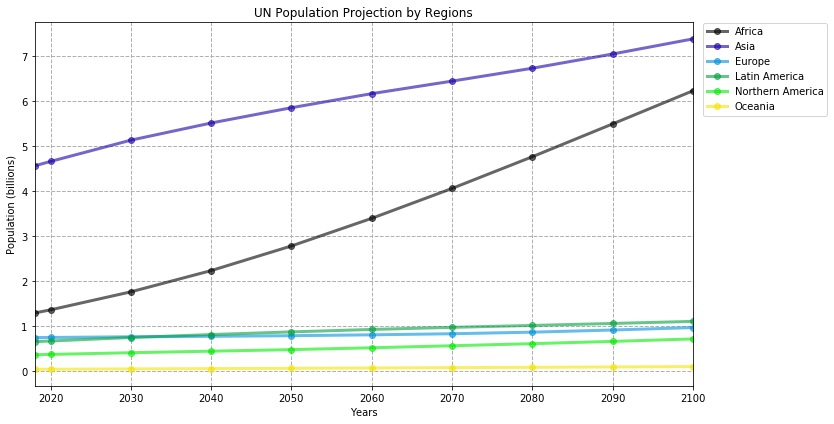

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
data = list()
for col, color in zip(region_plot.columns, nipy_cmap):
    ax.plot(region_plot[col]/10**9, linewidth=3, marker='o', alpha=0.6, color=color)
    data.append(col)

ax.legend(data, bbox_to_anchor=(0.212, 0.911, 1., .102))
ax.set_ylabel("Population (billions)")
ax.set_xlabel("Years")
ax.set_title("UN Population Projection by Regions")
ax.set_xlim([2018,2100])
ax.grid(linewidth=1, linestyle="--")
plt.tight_layout()
plt.show()

The regions outside of Africa and Asia see moderate amounts of growth. Much of the population growth increase is in Asia and Africa. The growth in Asia is possibly explained by China relaxing its one-child policy, allowing couples to have more children; and in India, where the majority of the population is under 30, is still growing significantly. Africa's population increases from a little over 1 billion to little over 6 billion. We can say that more than half the world's population increase between 2018 and 2100 takes place in Africa. 

## Population Growth by Country

In [16]:
#reset index by country name
#set a minimum threshold for countries exceed it

country_plot = df_countries.copy()
country_plot = country_plot[country_plot["2018"] > 10**7]

country_plot = (country_plot.set_index("country_name")
                            .transpose()
                            .drop("country_code", axis=0))

In [17]:
country_plot

country_name,Sweden,Portugal,Czechia,Dominican Republic,Haiti,Greece,Bolivia (Plurinational State of),Burundi,Cuba,Benin,...,Mexico,Russia,Bangladesh,Nigeria,Pakistan,Brazil,Indonesia,USA,India,China
2018,1.00229e+07,1.03342e+07,1.06702e+07,1.09376e+07,1.11657e+07,1.12012e+07,1.1269e+07,1.12719e+07,1.15273e+07,1.15346e+07,...,1.31413e+08,1.44618e+08,1.67181e+08,1.96646e+08,2.01739e+08,2.11931e+08,2.68071e+08,3.28093e+08,1.36062e+09,1.42171e+09
2020,1.02013e+07,1.02966e+07,1.07188e+07,1.12176e+07,1.14797e+07,1.11868e+07,1.16514e+07,1.20333e+07,1.15841e+07,1.2221e+07,...,1.35187e+08,1.45048e+08,1.7157e+08,2.07718e+08,2.10239e+08,2.15957e+08,2.74793e+08,3.34147e+08,1.39636e+09,1.43691e+09
2030,1.10802e+07,1.02069e+07,1.08763e+07,1.26163e+07,1.30721e+07,1.11357e+07,1.36938e+07,1.63117e+07,1.18776e+07,1.61685e+07,...,1.53755e+08,1.45584e+08,1.93969e+08,2.72599e+08,2.5364e+08,2.34826e+08,3.07682e+08,3.67627e+08,1.57583e+09,1.4913e+09
2040,1.18472e+07,1.0089e+07,1.08858e+07,1.38689e+07,1.44997e+07,1.10905e+07,1.57402e+07,2.15484e+07,1.1958e+07,2.0837e+07,...,1.69803e+08,1.4484e+08,2.12648e+08,3.52798e+08,2.97035e+08,2.49122e+08,3.3601e+08,3.98687e+08,1.72711e+09,1.50706e+09
2050,1.2753e+07,9.88111e+06,1.10346e+07,1.50022e+07,1.5776e+07,1.09442e+07,1.77866e+07,2.80967e+07,1.19226e+07,2.62796e+07,...,1.8416e+08,1.47436e+08,2.28822e+08,4.48534e+08,3.4165e+08,2.60581e+08,3.61229e+08,4.29529e+08,1.86347e+09,1.50616e+09
2060,1.38236e+07,9.67148e+06,1.12612e+07,1.6037e+07,1.692e+07,1.07285e+07,1.98231e+07,3.56458e+07,1.18324e+07,3.24676e+07,...,1.97003e+08,1.51974e+08,2.4257e+08,5.58337e+08,3.83968e+08,2.70421e+08,3.8493e+08,4.66799e+08,1.98874e+09,1.49773e+09
2070,1.49306e+07,9.53662e+06,1.1431e+07,1.69693e+07,1.78615e+07,1.05746e+07,2.1742e+07,4.41239e+07,1.17523e+07,3.92196e+07,...,2.07554e+08,1.56964e+08,2.53717e+08,6.79877e+08,4.22866e+08,2.77744e+08,4.07577e+08,5.07337e+08,2.09312e+09,1.49183e+09
2080,1.6148e+07,9.55229e+06,1.17929e+07,1.78384e+07,1.86925e+07,1.06022e+07,2.35586e+07,5.35911e+07,1.18997e+07,4.64509e+07,...,2.16954e+08,1.65191e+08,2.6338e+08,8.10122e+08,4.60074e+08,2.84125e+08,4.30718e+08,5.49273e+08,2.19116e+09,1.50322e+09
2090,1.7505e+07,9.74085e+06,1.24286e+07,1.86719e+07,1.95157e+07,1.08351e+07,2.53194e+07,6.36418e+07,1.22149e+07,5.40168e+07,...,2.26194e+08,1.76624e+08,2.7234e+08,9.45542e+08,4.95115e+08,2.91822e+08,4.54966e+08,5.9503e+08,2.28987e+09,1.53664e+09
2100,1.90044e+07,1.00314e+07,1.31551e+07,1.94751e+07,2.03158e+07,1.11826e+07,2.70125e+07,7.40715e+07,1.26483e+07,6.16742e+07,...,2.35452e+08,1.8838e+08,2.8121e+08,1.08218e+09,5.27649e+08,3.0136e+08,4.79568e+08,6.4426e+08,2.38835e+09,1.58627e+09


In [18]:
nipy_cmap = getmap("nipy_spectral", 90)

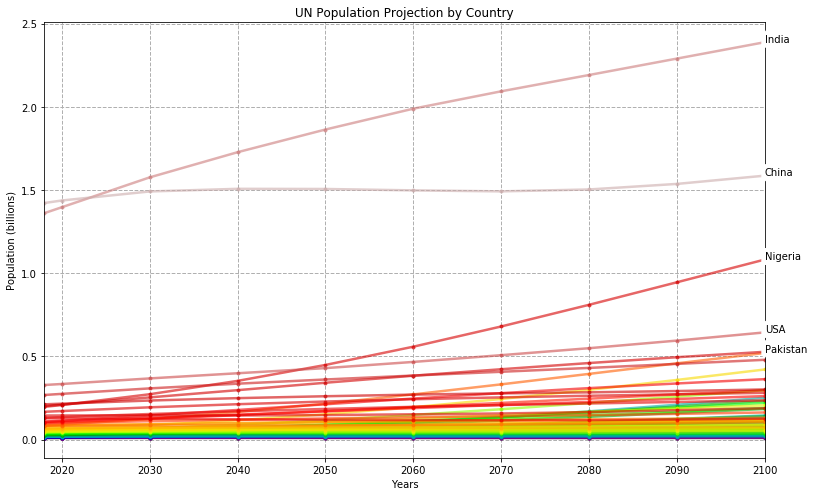

In [19]:
fig, ax = plt.subplots(figsize=(11,7))

for col, colors in zip(country_plot.columns, nipy_cmap):
    ax.plot(country_plot[col]/10**9, linewidth=2.5, marker='.', alpha=0.6, color=colors)

ax.set_ylabel("Population (billions)")
ax.set_xlabel("Years")
ax.set_title("UN Population Projection by Country")
ax.set_xlim([2018,2100])
ax.grid(linewidth=1, linestyle="--")

#grab the top 5 countries
def annotate_text(row):
    country = "{}".format(row["country_name"])
    population = row["2100"] / 10**9
    bbox_props = dict(boxstyle="round", fc="w", color="w")
    ax.annotate(country, xy=(2100, population), bbox=bbox_props, xycoords="data")
    
(df_countries.sort_values(by="2100", ascending=False)
             .head(5)
             .apply(annotate_text, axis=1))

plt.tight_layout()
plt.show()

According to the graph, India is expected to be the most populated country in the next decade. China's population growth stagnates at 1.5 billion until 2080. The US and Pakistan will see a constant population increase in the future.  Along with India, the UN projects Nigeria to have an impressive growth as it overtakes the US and Pakistan, making it the most populated country in Africa.  

## Population Decline

In [20]:
#find difference in population between present and future
df_countries["change"] = df_countries["2018"] / df_countries["2100"]

pop_change = df_countries[["country_name", "2018", "2100", "change"]].copy()
pop_change["pop_change"] = pop_change["2100"] - pop_change["2018"]
pop_change["%-"] = (pop_change["pop_change"]) / pop_change["2100"]

#make the format a little neater
pop_change["%-"] = pop_change["%-"].map("{:,.2%}".format)
pop_change[["2018", "2100", "pop_change"]] = pop_change[["2018", "2100", "pop_change"]].applymap("{:,.0f}".format)

In [21]:
#sort values and reset index to get the greatest percentage of population decline 
pop_change = (pop_change.sort_values(by="change", ascending=False, inplace=False)
                        .reset_index(drop=True))

In [22]:
#rename columns
pop_change = (pop_change.rename(columns={
    "country_name": "Country",
    "2018": "2018 Population",
    "2100": "2100 Population",
    "pop_change": "Population Change",
    "%-": "% Change"
}))

In [23]:
pop_change[["Country", "2018 Population", "2100 Population", 
            "Population Change", "% Change"]].head(10)

,Country,2018 Population,2100 Population,Population Change,% Change
0,Republic of Moldova,"4,061,241","3,374,840","-686,401",-20.34%
1,Bulgaria,"7,062,092","6,149,258","-912,834",-14.84%
2,Poland,"38,277,697","34,227,566","-4,050,131",-11.83%
3,United States Virgin Islands,"105,419","97,387","-8,032",-8.25%
4,Jamaica,"2,913,869","2,705,903","-207,966",-7.69%
5,Latvia,"1,937,956","1,807,774","-130,182",-7.20%
6,Puerto Rico,"3,676,946","3,460,261","-216,685",-6.26%
7,Croatia,"4,179,968","3,939,977","-239,991",-6.09%
8,Albania,"2,948,239","2,809,693","-138,546",-4.93%
9,Portugal,"10,334,191","10,031,434","-302,757",-3.02%


The Republic of Moldova, regarding percentage, will experience the most significant population decrease. Bulgaria and Poland are not too far behind. The population decrease is not as not as extreme compared to the top 3. 

## Population Growth

In [24]:
pop_change = (pop_change.sort_values(by="change", inplace=False)
                        .reset_index(drop=True))

In [25]:
pop_change[["Country", "2018 Population", "2100 Population", 
            "Population Change", "% Change"]].head(10)

,Country,2018 Population,2100 Population,Population Change,% Change
0,Niger,"22,390,410","251,440,978","229,050,568",91.10%
1,Angola,"30,892,254","233,473,951","202,581,697",86.77%
2,Zambia,"17,683,886","129,413,935","111,730,049",86.34%
3,Tanzania,"59,360,314","421,501,219","362,140,905",85.92%
4,Somalia,"15,236,599","107,944,790","92,708,191",85.88%
5,Uganda,"44,454,816","296,714,917","252,260,101",85.02%
6,Burundi,"11,271,870","74,071,534","62,799,664",84.78%
7,Democratic Republic of the Congo,"84,344,305","520,530,194","436,185,889",83.80%
8,Congo,"5,425,827","32,988,510","27,562,683",83.55%
9,Mozambique,"30,656,342","183,947,197","153,290,855",83.33%


The countries with the most significant population increase are all in Africa. Not surprising as you can look at the chart and conclude Africa's exponential growth between 2018 and 2100. 